In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('unusual_customer_data.csv')
print(f'{data.head()}\n')
print(data.isnull().sum())

   customer_id  total_booking  cancelled_rate  low_price_booking_rate  \
0          261              7            0.43                    0.29   
1           23             14            0.57                    0.29   
2          238              8            0.38                    0.13   
3          355             11            0.45                    0.36   
4           46             10            0.40                    0.40   

   avg_day_between  total_day_stayed  
0               92                46  
1               48                96  
2               91                30  
3               68                72  
4               78                82  

customer_id               0
total_booking             0
cancelled_rate            0
low_price_booking_rate    0
avg_day_between           0
total_day_stayed          0
dtype: int64


In [4]:
# Chọn feature và chuẩn hoá dữ liệu
ft = ['total_booking', 'cancelled_rate', 'low_price_booking_rate', 'avg_day_between', 'total_day_stayed']
scaler = StandardScaler()
df = scaler.fit_transform(data[ft])

In [5]:
# Sử dụng ISO để tìm ngoại lệ
iso = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)
data['score'] = iso.fit_predict(df)

df_unusual = data[data['score'] == -1]
df_unusual


,customer_id,total_booking,cancelled_rate,low_price_booking_rate,avg_day_between,total_day_stayed,score
16,161,4,0.25,0.25,144,31,-1
38,9,17,0.35,0.12,41,169,-1
70,281,23,0.39,0.30,32,177,-1
128,476,19,0.26,0.21,34,166,-1
166,130,20,0.15,0.25,35,155,-1
176,256,7,0.14,0.57,92,36,-1
197,93,19,0.42,0.16,33,130,-1
220,124,4,0.75,0.25,90,34,-1
229,110,18,0.39,0.28,40,155,-1
272,219,24,0.38,0.13,30,211,-1


In [6]:
# df_unusual.to_csv('black_list_customer.csv', index=False)

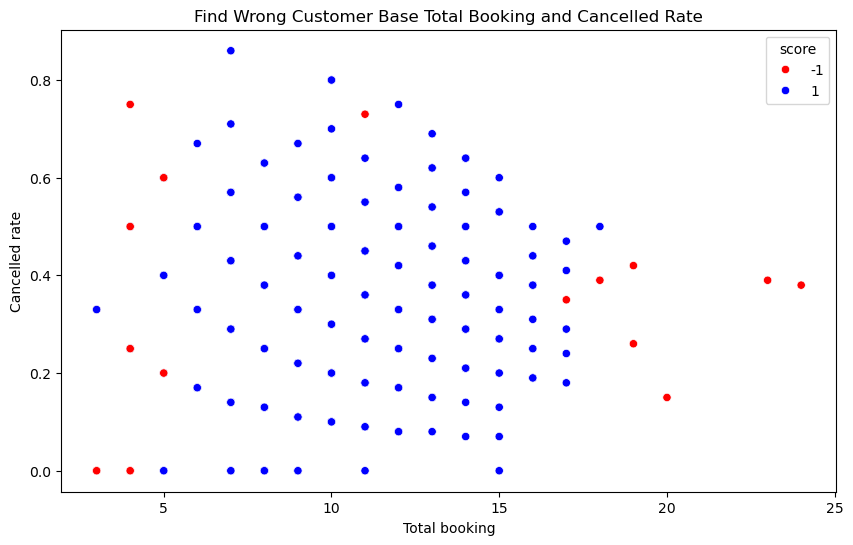

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x='total_booking', y='cancelled_rate', hue=data['score'], palette={-1: 'red', 1: 'blue'})
plt.xlabel('Total booking')
plt.ylabel('Cancelled rate')
plt.title('Find Wrong Customer Base Total Booking and Cancelled Rate')
plt.show()
